In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import bokeh
import seaborn as sns
warnings.filterwarnings("ignore")

In [203]:
df = pd.read_csv('kdrama.csv')

In [764]:
df

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Genre,Director,Writer,Year,No of Episodes,Network
0,Legend of the Blue Sea,8.1,"[Jun Ji-hyun, Lee Min-ho]",17.60,"[Fantasy, Romance, Comedy]","[Jin Hyuk, Park Seon-Ho]",[Park Ji-eun],2016,21.0,SBS
1,The Heirs,7.5,"[Lee Min-ho, Park Shin-hye, Kim Woo-bin]",16.70,"[Romance, Drama, Teen]","[Kang Shin-hyo, Boo Sung-chul]",[Kim Eun-sook],2013,20.0,SBS
2,The King: Eternal Monarch,8.3,"[Lee Min-ho, Kim Go-eun, Woo Do-hwan, Kim Kyun...",7.70,"[Romance, Fantasy, Drama]","[Baek Sang-hoon, Jung Ji-hyun, Yoo Je-won]",[Kim Eun-sook],2020,16.0,SBS
3,Boys over Flowers,7.9,"[Lee Min-ho, Ku Hye-sun, Kim Hyun-joong, Kim B...",25.70,"[Romance, Comedy, Drama]",[Jeon Ki-sang],[Yoon Ji-ryun],2009,25.0,KBS
4,Guardian: the lonely and the great god,8.6,"[Gong Yoo, Kim Go-eun, Lee Dong-wook, Yoo In-n...",12.81,"[Fantasy, Romance, Drama]","[Lee Eung-bok, Kwon Hyuk-chan, Yoon Jong-ho]",[Kim Eun-sook],2016,18.0,TvN
...,...,...,...,...,...,...,...,...,...,...
83,Hospital Playlist,8.7,"[Jo Jung-suk, Yoo Yeon-seok, Jung Kyung-ho, Ki...",10.90,"[Medical, Drama, Romance, Comedy, Life]",[Shin Won-ho],[Lee Woo-jung],2020,12.0,TvN
84,Abyss,7.1,"[Ahn Hyo-seop, Lee Sung-jae, Park Bo-young]",2.66,"[Romance, Comedy, Fantasy, Crime]",[Yoo Je-won],[Moon Soo-yeon],2019,16.0,TvN
85,School 2017,7.6,"[Kim Jung-hyun, Kim Se-jeong, Jang Dong-yoon, ...",4.80,"[Coming-of-age, Teen, Comedy, Romance]","[Park Jin-suk, Song Min-yeob]","[Jung Chan-mi, Kim Seung-won]",2017,16.0,KBS
86,My roommate is a gumiho,8.7,"[Jang Ki-yong, Lee Hye-ri, Kang Han-na]",5.50,"[Romance, Comedy, Fantasy]","[Nam Sung-woo, Park Joon Hwa]","[Baek Sun-woo, Choi Bo-rim]",2021,16.0,TvN


In [205]:
def formatting(lst):
    for col in lst:
        for i in range(df.shape[0]):
            df[col][i] = df[col][i].split(',')

        for i in range(df.shape[0]):
            for j in range(len(df[col][i])):
                df[col][i][j] = df[col][i][j].lstrip()
        
    

In [206]:
format_col = ['Actors','Genre','Director','Writer']

In [207]:
formatting(format_col)

Genre List

In [300]:
g_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Genre'][i])):
        g_list.append(df['Genre'][i][j])
Genre_list = list(set(g_list))

Network List

In [301]:
Network_list = df['Network'].unique().tolist()

Actors List

In [302]:
a_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Actors'][i])):
        a_list.append(df['Actors'][i][j])
Actors_list = list(set(a_list))

Directors List

In [305]:
d_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Director'][i])):
        d_list.append(df['Director'][i][j])
Directors_list = list(set(d_list))


Writers List

In [308]:
w_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Writer'][i])):
        w_list.append(df['Writer'][i][j])
Writers_list = list(set(w_list))


Drama List

In [472]:
dr_list = []
for i in range(df.shape[0]):
    dr_list.append(df['Drama Name'][i])
Drama_List = dr_list


### Networking Companies

In [222]:
network = df.copy()

In [223]:
a = network.groupby(by="Network").sum()

Text(0, 0.5, 'Popularity')

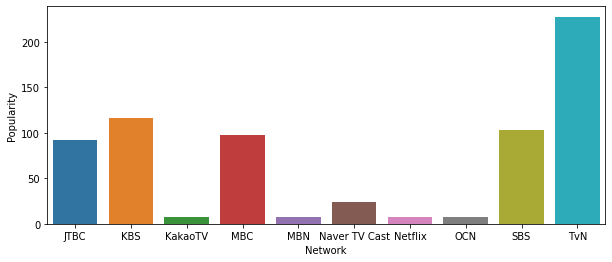

In [224]:
plt.figure(figsize=(10,4))
sns.barplot(x=a.index,y='Rating(Out of 10)',data=a)
plt.ylabel("Popularity")

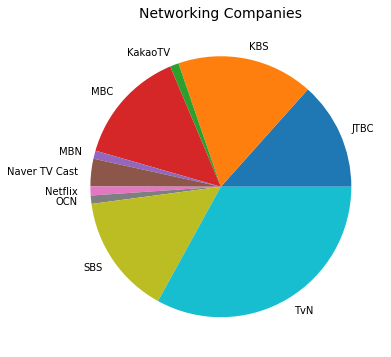

In [372]:
pie, ax = plt.subplots(figsize=[10,6])
labels = a.index.tolist()
plt.pie(x=a['Rating(Out of 10)'].tolist(), labels=labels, pctdistance=0.5)
plt.title("Networking Companies", fontsize=14);


In [373]:
d = dict()

In [374]:
def genre_dictionary(com_list):
    dictionary_list = []
    for c in com_list:
        a = network.loc[:,('Genre','Network')]
        b = a[a['Network'] == c]
        d = dict((g,0) for g in Genre_list)
        for i in (b.index.to_list()):
            for j in range(len(b['Genre'][i])):
                for k in Genre_list:
                    if b['Genre'][i][j] == k:
                        d[k] +=1
        dictionary_list.append(d)
        
    return dictionary_list

    
    
    

In [375]:
dic = genre_dictionary(Network_list)

In [376]:
for i,j in zip(Network_list,dic):
    d[i] = j

In [416]:
netdata = pd.DataFrame.from_dict(d, orient ='index') 


In [436]:
#Piechart
def network_piechart(nw):
    d = netdata[netdata.index == str(nw)]
    plt.figure(figsize=(9,9))
    net_list = []
    for i in range(1):
        for j in range(d.shape[1]):
            if d.iloc[i,j] == 0:
                pass
            else:
                net_list.append(d.columns[j])
    Genre = net_list


    Value = list(filter(lambda a: a != 0,d.iloc[0,:].tolist()))


    # Pie Chart
    plt.pie(Value, labels=Genre,
            autopct='%1.1f%%', pctdistance=0.9)

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)

    # Adding Title of chart
    plt.title(nw)

    # Displaing Chart
    plt.show()

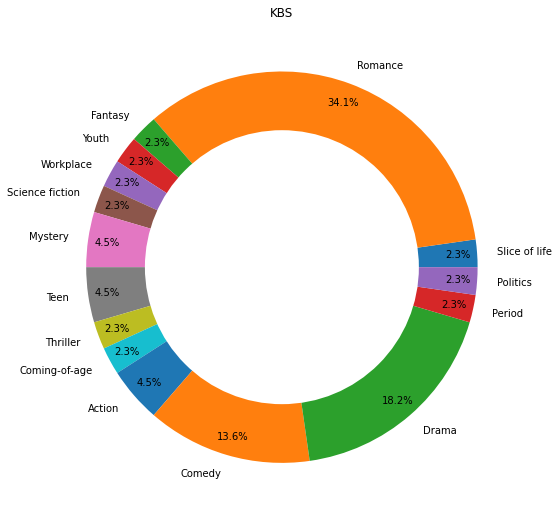

In [437]:
network_piechart('KBS')

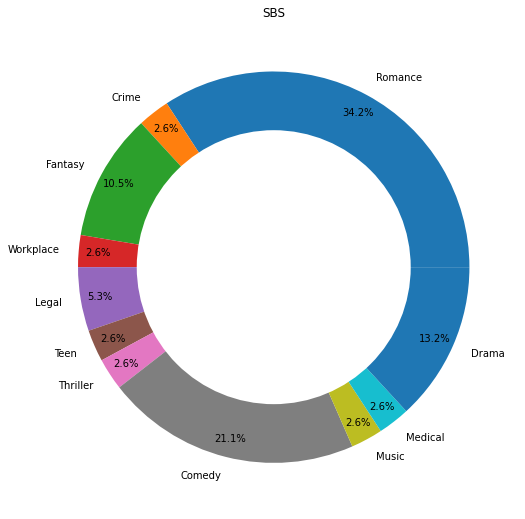

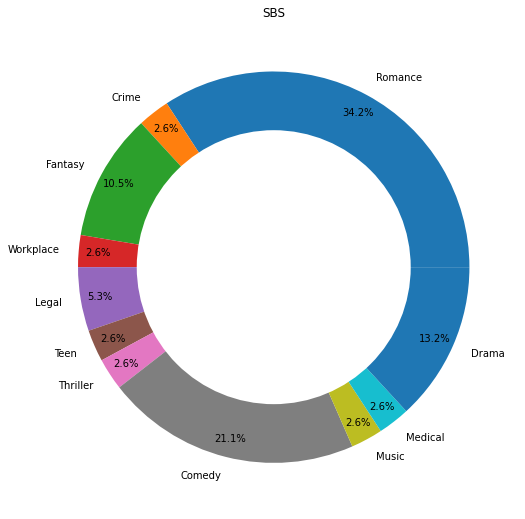

In [438]:
network_piechart('SBS')

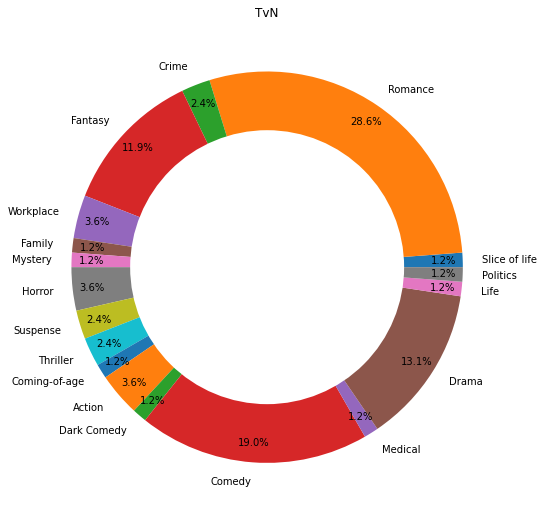

In [440]:
network_piechart('TvN')

## Actors

In [963]:
actors = df.copy()


In [964]:
A = actors.loc[:,('Drama Name','Rating(Out of 10)','Actors','Genre','Network')]

In [965]:
drama_list = []
for c in Drama_List:
    a = actors.loc[:,('Drama Name','Rating(Out of 10)','Actors','Genre','Network')]
    b = a[a['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)
        


In [966]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j


Enter the actor name:Lee Min-ho
Legend of the Blue Sea
The Heirs
The King: Eternal Monarch
Boys over Flowers


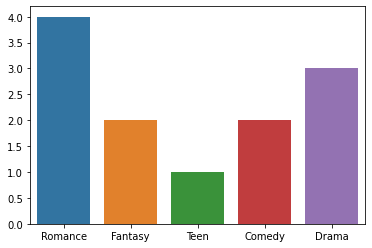

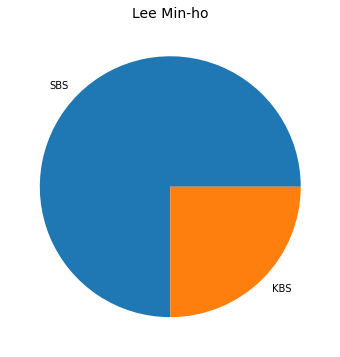

In [967]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
actordata = pd.merge(A,dramadata,on='Drama Name')
actdata = pd.DataFrame(columns = actordata.columns.tolist())
index_ = []
user = input("Enter the actor name:")
for i in range(actordata.shape[0]):
    if user in actordata['Actors'][i]:
        index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
        print(actordata['Drama Name'][i])
result = pd.concat(index_)
#result.iloc[:,4:].sum()
lst = []
z = result.iloc[:,5:]
for i in range(z.sum().shape[0]):
    if z.sum()[i] == 0:
        lst.append(z.columns[i])   
z = z.drop(lst,axis=1)  
sns.barplot(z.columns.tolist(),z.sum())
pie, ax = plt.subplots(figsize=[10,6])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
plt.title(user, fontsize=14);


TOP 5 Popular Actors/Actress


In [979]:
index_ = []
act_ = []
for i in range(actordata.shape[0]):
    for j in Actors_list:
        if j in actordata['Actors'][i]:
            act_.append(j)
            index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
result = pd.concat(index_)
result['Actor Name'] = act_
result.groupby('Actor Name')['Drama Name','Rating(Out of 10)'].count().sort_values(by='Drama Name',ascending=False).head(5).iloc[:,:-1]

,Drama Name
Actor Name,
Park Shin-hye,5
Bae Suzy,4
Gong Yoo,4
Lee Min-ho,4
Park Seo-joon,4


## Drama

In [990]:
Drama = df.copy()

In [991]:
Drama = Drama.drop(['Actors','Director','Writer','Network'],axis=1)

In [992]:
drama_list = []
for c in Drama_List:
    b = Drama[Drama['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)
        

In [993]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [994]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Drama = pd.merge(Drama,dramadata,on='Drama Name')
Drama = Drama.drop(['Genre'],axis=1)

In [995]:
Drama

,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes,Slice of life,Romance,Crime,Fantasy,Youth,...,Action,Dark Comedy,Comedy,Music,Sports,Medical,Drama,Period,Life,Politics
0,Legend of the Blue Sea,8.1,17.60,2016,21.0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,The Heirs,7.5,16.70,2013,20.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,The King: Eternal Monarch,8.3,7.70,2020,16.0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Boys over Flowers,7.9,25.70,2009,25.0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,Guardian: the lonely and the great god,8.6,12.81,2016,18.0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Hospital Playlist,8.7,10.90,2020,12.0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
84,Abyss,7.1,2.66,2019,16.0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
85,School 2017,7.6,4.80,2017,16.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
86,My roommate is a gumiho,8.7,5.50,2021,16.0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


Enter the Drama name:Boys over Flowers


<AxesSubplot:>

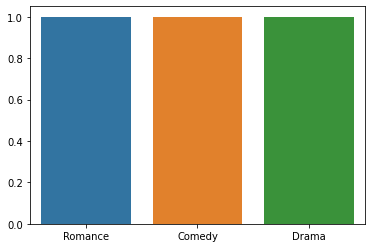

In [996]:
index_ = []
user = input("Enter the Drama name:")
for i in range(Drama.shape[0]):
    if user in Drama['Drama Name'][i]:
        index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
result = pd.concat(index_)
#result.iloc[:,4:].sum()
lst = []
z = result.iloc[:,5:]
for i in range(z.sum().shape[0]):
    if z.sum()[i] == 0:
        lst.append(z.columns[i])   
z = z.drop(lst,axis=1)  
sns.barplot(z.columns.tolist(),z.sum())

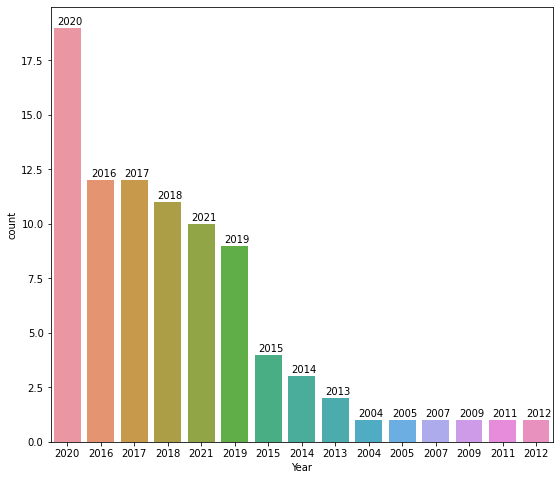

In [997]:
plt.figure(figsize=(9,8))
ax = sns.countplot(Drama["Year"], 
                   order = Drama["Year"].value_counts().index)

for p, label in zip(ax.patches, Drama["Year"].value_counts().index):
    ax.annotate(label, (p.get_x()+0.1, p.get_height()+0.15))

Recommended Top 5 Kdrama Based on :

1. General

In [998]:
Drama.sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
53,Reply 1988,9.1,12.30,2015,20.0
14,It’s okay to not be okay,8.8,5.42,2020,16.0
52,Youth of May,8.8,4.30,2021,12.0
34,Flower of Evil,8.8,3.92,2020,16.0
73,Doom at your service,8.8,3.00,2021,16.0


2. Year

In [999]:
year = int(input('Enter Year:'))
Drama[Drama['Year'] == year].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

Enter Year:2021


,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
52,Youth of May,8.8,4.30,2021,12.0
73,Doom at your service,8.8,3.00,2021,16.0
86,My roommate is a gumiho,8.7,5.50,2021,16.0
59,Vincenzo,8.6,10.44,2021,20.0
74,Law school,8.1,5.30,2021,16.0


3. Genre

In [1000]:
genre = input("Enter your Genre:")
Drama[Drama[genre] == 1].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

Enter your Genre:Drama


,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
14,It’s okay to not be okay,8.8,5.42,2020,16.0
52,Youth of May,8.8,4.30,2021,12.0
34,Flower of Evil,8.8,3.92,2020,16.0
40,Crash Landing on you,8.7,12.15,2019,16.0
83,Hospital Playlist,8.7,10.90,2020,12.0


4.Number of Episodes

In [791]:
epi = int(input("Enter your atmost number of episodes:"))
Drama[Drama['No of Episodes'] <= epi].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

Enter your atmost number of episodes:16


,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
14,It’s okay to not be okay,8.8,5.42,2020,16.0
52,Youth of May,8.8,4.30,2021,12.0
34,Flower of Evil,8.8,3.92,2020,16.0
73,Doom at your service,8.8,3.00,2021,16.0
40,Crash Landing on you,8.7,12.15,2019,16.0


## Director

In [1001]:
Director = df.copy()
Director = Director.drop(['Actors','Writer','No of Episodes'],axis=1)

In [1002]:
drama_list = []
for c in Drama_List:
    b = Director[Director['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)


In [1003]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [1004]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Director = pd.merge(Director,dramadata,on='Drama Name')
Director = Director.drop(['Genre'],axis=1)

Enter the Director name:Park Shin-woo
It’s okay to not be okay
Don’t dare to dream
About time

Genres that Director has worked with:
{'Comedy', 'Romance', 'Fantasy', 'Drama', 'Workplace'}


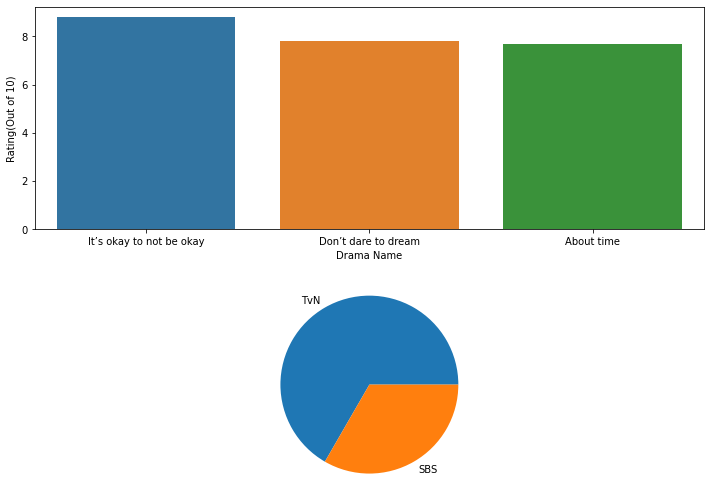

In [1006]:
plt.figure(figsize=(12,9))
index_ = []
user = input("Enter the Director name:")
for i in range(Director.shape[0]):
    if user in Director['Director'][i]:
        print(Director['Drama Name'][i])
        index_.append(Director[Director['Drama Name'] == Director['Drama Name'][i]])
result = pd.concat(index_)
plt.subplot(2,1,1)
sns.barplot(x='Drama Name',y='Rating(Out of 10)',data=result)
plt.subplot(2,1,2)
#pie, ax = plt.subplots(figsize=[10,9])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
#plt.title(user, fontsize=14);
print("\nGenres that Director has worked with:")
z = result.iloc[:,6:]
col = set()
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z.iloc[i,j] == 1:
            col.add(z.columns[j])
print(col)     

##### Top 5 Directors

In [957]:
index_ = []
dir_ = []
for i in range(Director.shape[0]):
    for j in Directors_list:
        if j in Director['Director'][i]:
            dir_.append(j)
            index_.append(Director[Director['Drama Name'] == Director['Drama Name'][i]])
result = pd.concat(index_)
result['Director Name'] = dir_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Director','Year','Network'],axis=1)
result.groupby('Director Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Director Name,,
Park Joon-hwa,31.6,18.25
Park Shin-woo,24.3,16.40
Jung Dae-yoon,23.8,28.67
Shin Won-ho,17.8,23.20
Lee Eung-bok,16.9,39.31


## Writer

In [1008]:
Writer = df.copy()
Writer = Writer.drop(['Actors','Director','No of Episodes'],axis=1)

In [1010]:
drama_list = []
for c in Drama_List:
    b = Writer[Writer['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)


In [1011]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [1012]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Writer = pd.merge(Writer,dramadata,on='Drama Name')
Writer = Writer.drop(['Genre'],axis=1)

Enter the Director name:Kim Eun-sook
The Heirs
The King: Eternal Monarch
Guardian: the lonely and the great god
Descendants of the sun

Genres that Writer has wrote with:
{'Romance', 'Action', 'Fantasy', 'Drama', 'Teen'}


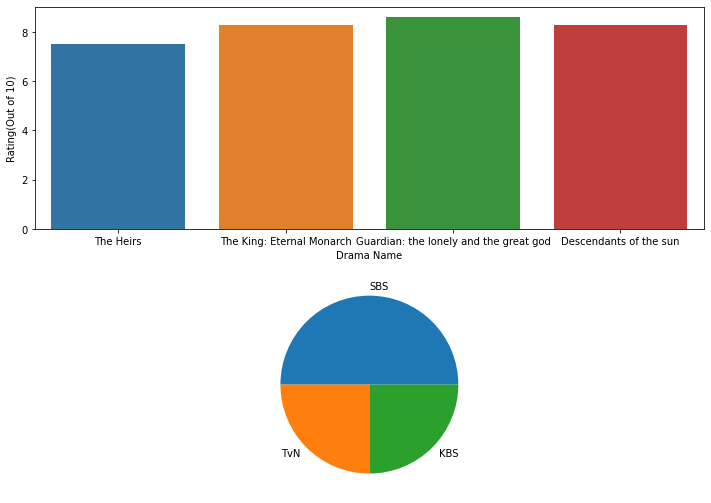

In [1017]:
plt.figure(figsize=(12,9))
index_ = []
user = input("Enter the Director name:")
for i in range(Writer.shape[0]):
    if user in Writer['Writer'][i]:
        print(Writer['Drama Name'][i])
        index_.append(Writer[Writer['Drama Name'] == Writer['Drama Name'][i]])
result = pd.concat(index_)
plt.subplot(2,1,1)
sns.barplot(x='Drama Name',y='Rating(Out of 10)',data=result)
plt.subplot(2,1,2)
#pie, ax = plt.subplots(figsize=[10,9])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
#plt.title(user, fontsize=14);
print("\nGenres that Writer has wrote with:")
z = result.iloc[:,6:]
col = set()
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z.iloc[i,j] == 1:
            col.add(z.columns[j])
print(col)     

##### TOP 5 Writers

In [1016]:
index_ = []
wri_ = []
for i in range(Writer.shape[0]):
    for j in Writers_list:
        if j in Writer['Writer'][i]:
            wri_.append(j)
            index_.append(Writer[Writer['Drama Name'] == Writer['Drama Name'][i]])
result = pd.concat(index_)
result['Writer Name'] = wri_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Writer','Year','Network'],axis=1)
result.groupby('Writer Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Writer Name,,
Kim Eun-sook,32.7,63.71
Park Ji-eun,25.0,57.85
Park Hye-ryun,24.6,23.32
Hong Jung-run,21.8,21.61
Hong Mi-ran,21.8,21.61
